<a href="https://colab.research.google.com/github/Kulraj01/Kulraj01/blob/main/Bondora_financial_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                           count           mean  \
LoanNumber                              134529.0  944939.218711   
BidsPortfolioManager                    134529.0     966.452876   
BidsApi                                 134529.0      29.111664   
BidsManual                              134529.0     559.332590   
ApplicationSignedHour                   134529.0      13.374640   
...                                          ...            ...   
PreviousEarlyRepaymentsCountBeforeLoan  134529.0       0.069903   
NextPaymentNr                            97788.0       5.178795   
NrOfScheduledPayments                    97788.0      50.126795   
PrincipalDebtServicingCost               59129.0       5.264702   
InterestAndPenaltyDebtServicingCost      59129.0      89.851455   

                                                  std   min       25%  \
LoanNumber                              478673.842616  37.0  620679.0   
BidsPortfolioManager                      1355.68

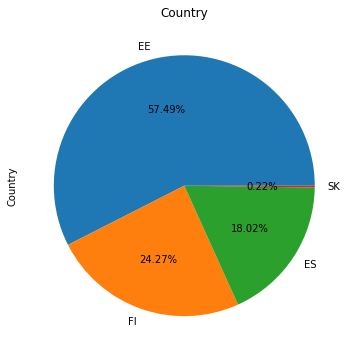

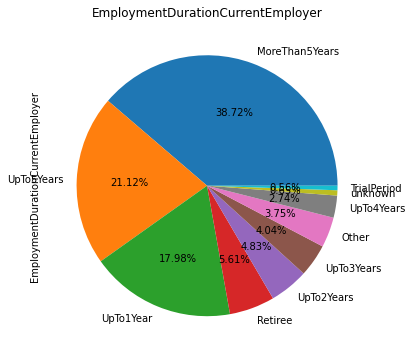

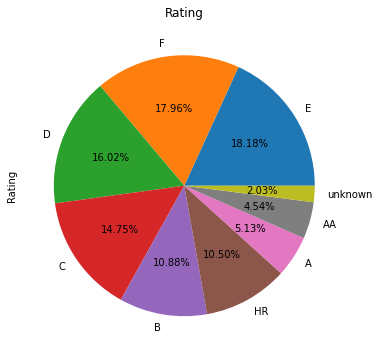

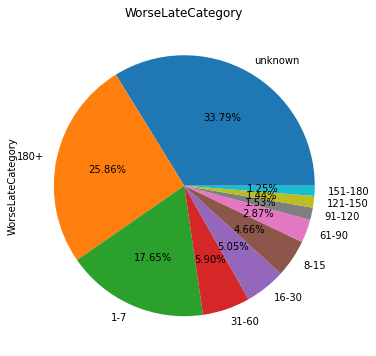

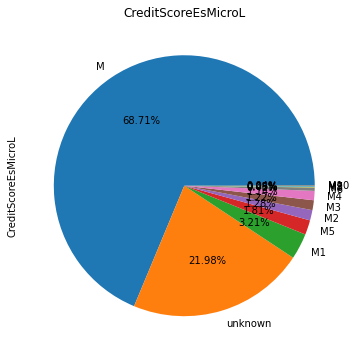

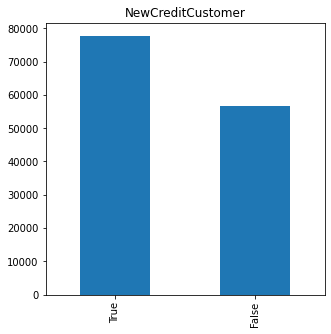

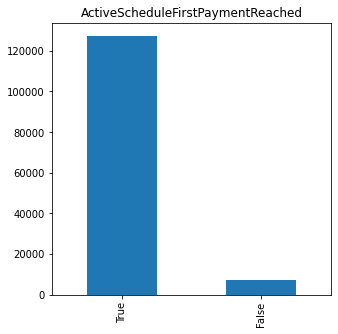

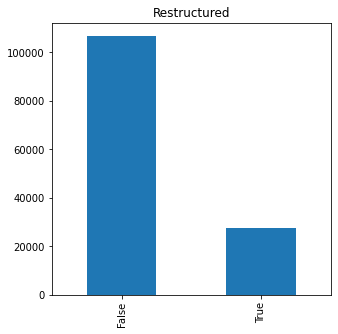

ValueError: ignored

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
path= "/content/Bondora_raw.csv"
data= pd.read_csv(path, low_memory=False)

data.shape

list_of_50_percent_null = [ ]
for i in data.columns:
    if data[i].isnull().sum() >= (90*179235)/100:
        list_of_50_percent_null.append(i)

list_of_50_percent_null

data = data.drop(list_of_50_percent_null, axis=1)

print(data.describe().transpose())

data.dtypes

names= data.columns

cat_data= data.select_dtypes('object')
data = data.drop(cat_data.columns, axis=1)

bool_data= data.select_dtypes('bool')
data = data.drop(bool_data.columns, axis=1)
cat_data

bool_data

cat_data =cat_data.fillna("unknown")
date_type= cat_data["BiddingStartedOn"].astype('datetime64[ns]')
cat_data= cat_data.drop(['BiddingStartedOn'],axis=1)
features_cat_data= list(cat_data.columns)
features_cat_data_viz= ["Country","EmploymentDurationCurrentEmployer","Rating","WorseLateCategory",
                   "CreditScoreEsMicroL"]
for i in features_cat_data_viz:
    cat_data[i].value_counts().plot(kind='pie', figsize=(6,6), autopct="%1.2f%%")
    plt.title(i)
    plt.show()

features_bool_data= list(bool_data.columns)
features_bool_data_viz= ["NewCreditCustomer", "ActiveScheduleFirstPaymentReached","Restructured"]
for i in features_bool_data_viz:
    bool_data[i].value_counts().plot(kind='bar', figsize=(5,5))
    plt.title(i)
    plt.show()

cat_array= np.array(cat_data).reshape(-1)
bool_array= np.array(bool_data).reshape(-1)
from sklearn.preprocessing import LabelEncoder
encoder_1= LabelEncoder()
encoder_2= LabelEncoder()
cat_enc= encoder_1.fit_transform(cat_array)
bool_enc= encoder_2.fit_transform(bool_array)

cat_enc= pd.DataFrame(cat_enc.reshape(179235,int(cat_enc.shape[0]/179235)))
bool_enc= pd.DataFrame(bool_enc.reshape(179235,int(bool_enc.shape[0]/179235)))
cat_enc.columns= features_cat_data
bool_enc.columns= features_bool_data
object_data = pd.concat([cat_enc,bool_enc], axis=1)
object_data

from sklearn.impute import SimpleImputer
data

names_num = data.columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(np.array(data))
imp_data= imp_median.transform(data)
data= pd.DataFrame(imp_data)
data.columns= names_num
data

data.describe().transpose()

def z_score_normalizer(X):
    m = X.shape[0]
    n = 1
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X
data = z_score_normalizer(data)

Y= object_data['Status']
object_data = object_data.drop(['Status'],axis=1)
Y=encoder_1.inverse_transform(Y)
Y= pd.DataFrame(Y, columns=['Status'])
Y.Status.unique()

Y= Y.loc[Y.Status!='Current']
Y= Y.replace(['Late','Repaid'],[0,1])
Y

all_data = pd.concat([object_data,data,Y], axis=1)
all_data

all_data= all_data.dropna()